# 1 - 前言

之前我们学习的算法均为监督学习算法，而K-means是我们所学习的第一个无监督学习算法。所以首先让我们了解一下监督学习和无监督学习的区别

## 1.1 - 监督学习（supervised learning）

从给定的训练数据集中学习出一个函数（模型参数），当新的数据到来时，可以根据这个函数预测结果。

监督学习的训练集要求包括输入输出，也可以说是特征和目标。训练集中的目标是由人标注的。

监督学习就是最常见的分类（注意和聚类区分）问题，通过已有的训练样本（即已知数据及其对应的输出）去训练得到一个最优模型（这个模型属于某个函数的集合，最优表示某个评价准则下是最佳的），再利用这个模型将所有的输入映射为相应的输出，对输出进行简单的判断从而实现分类的目的。也就具有了对未知数据分类的能力。

监督学习的目标往往是让计算机去学习我们已经创建好的分类系统（模型）。

## 1.2 - 无监督学习（unsupervised learning）

输入数据没有被标记，也没有确定的结果。样本数据类别未知，需要根据样本间的相似性对样本集进行分类（聚类，clustering）试图使类内差距最小化，类间差距最大化。通俗点将就是实际应用中，不少情况下无法预先知道样本的标签，也就是说没有训练样本对应的类别，因而只能从原先没有样本标签的样本集开始学习分类器设计。

非监督学习目标不是告诉计算机怎么做，而是让它（计算机）自己去学习怎样做事情。非监督学习有两种思路。第一种思路是在指导Agent时不为其指定明确分类，而是在成功时，采用某种形式的激励制度。需要注意的是，这类训练通常会置于决策问题的框架里，因为它的目标不是为了产生一个分类系统，而是做出最大回报的决定，这种思路很好的概括了现实世界，agent可以对正确的行为做出激励，而对错误行为做出惩罚。

## 1.3 - 监督学习和无监督学习的区别

*  有监督学习方法必须要有训练集与测试样本。在训练集中找规律，而对测试样本使用这种规律。而非监督学习没有训练集，只有一组数据，在该组数据集内寻找规律。


* 有监督学习的方法就是识别事物，识别的结果表现在给待识别数据加上了标签。因此训练样本集必须由带标签的样本组成。而非监督学习方法只有要分析的数据集的本身，预先没有什么标签。如果发现数据集呈现某种聚集性，则可按自然的聚集性分类，但不予以某种预先分类标签对上号为目的。


* 非监督学习方法在寻找数据集中的规律性，这种规律性并不一定要达到划分数据集的目的，也就是说不一定要“分类”。
 这一点是比有监督学习方法的用途要广。
 譬如分析一堆数据的主分量，或分析数据集有什么特点都可以归于非监督学习方法的范畴。
 
 
* 用非监督学习方法分析数据集的主分量与用K-L变换计算数据集的主分量又有区别。后者从方法上讲不是学习方法。因此用K-L变换找主分量不属于无监督学习方法，即方法上不是。而通过学习逐渐找到规律性这体现了学习方法这一点。在人工神经元网络中寻找主分量的方法属于无监督学习方法。 

# 2 - K-Means算法简介

K-means是机器学习中一个比较常用的算法，属于无监督学习算法，其常被用于数据的聚类，只需为它指定簇的数量即可自动将数据聚合到多类中，相同簇中的数据相似度较高，不同簇中数据相似度较低。

# 3 - K-menas的优缺点：

优点：

* 原理简单

* 速度快

* 对大数据集有比较好的伸缩性

缺点：

* 需要指定聚类 数量K

* 对异常值敏感

* 对初始值敏感

# 4 - K-means的聚类过程：

1. 随机选取k个聚类质心点（cluster centroids）为
    $$u_1,u_2,\dots,u_k\in \mathbb{R}^n$$

2. 重复下面过程直到收敛
    对于每个样例$i$,计算其应该属于的类
    $$c^{(i)}:=\underset {j}{argmin}||x^{(i)}-u_j||^2$$
    
3. 对于每一个类j,重新计算该类的质心
    
    $$u_j:=\frac{\sum_{i=1}^m1\left\{c^{(i)}=j\right\}x^{(i)}}{\sum_{i=1}^m1\left\{c^{(i)}=j\right\}}$$
    
4. 对于所有的c个聚类中心，如果利用（2）（3）的迭代法更新后，值保持不变，则迭代结束，否则继续迭代。

## 聚类过程的图解：

![ce2342470268c3f3bc082d87fc35e14e.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/14-1.png?raw=true)

该算法的最大优势在于简洁和快速。算法的关键在于初始中心的选择和距离公式。


# 5 - Python实现K-means算法

需要类聚的数据集为：
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]
 [0.98837384 0.10204481]
 [0.20887676 0.16130952]
 [0.65310833 0.2532916 ]
 [0.46631077 0.24442559]
 [0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]
 [0.82099323 0.09710128]
 [0.83794491 0.09609841]
 [0.97645947 0.4686512 ]
 [0.97676109 0.60484552]
 [0.73926358 0.03918779]
 [0.28280696 0.12019656]
 [0.2961402  

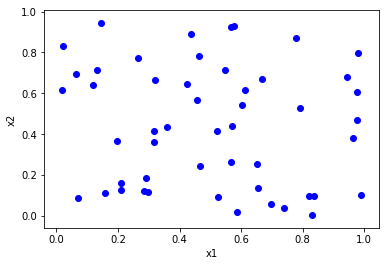

In [1]:
import numpy
import random
import matplotlib.pyplot as plt

#随机生成50个需要聚类的数据
numpy.random.seed(0)
a=numpy.random.random((50,2))
#可视化数据集
for i in range(50):
    plt.scatter(a[i][0], a[i][1],color='blue')
print("需要类聚的数据集为：\n",a)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

***** 第1次迭代 *****
聚类中心:  [0.19658236, 0.36872517]
对应聚类:  [[0.5488135, 0.71518937], [0.60276338, 0.54488318], [0.4236548, 0.64589411], [0.43758721, 0.891773], [0.56804456, 0.92559664], [0.0202184, 0.83261985], [0.77815675, 0.87001215], [0.46147936, 0.78052918], [0.11827443, 0.63992102], [0.14335329, 0.94466892], [0.52184832, 0.41466194], [0.26455561, 0.77423369], [0.45615033, 0.56843395], [0.0187898, 0.6176355], [0.61209572, 0.616934], [0.3595079, 0.43703195], [0.66676672, 0.67063787], [0.31542835, 0.36371077], [0.57019677, 0.43860151], [0.19658236, 0.36872517], [0.31798318, 0.41426299], [0.0641475, 0.69247212], [0.5759465, 0.9292962], [0.31856895, 0.66741038], [0.13179786, 0.7163272]]
聚类中心:  [0.82099323, 0.09710128]
对应聚类:  [[0.96366276, 0.38344152], [0.79172504, 0.52889492], [0.97861834, 0.79915856], [0.94374808, 0.6818203], [0.6976312, 0.06022547], [0.98837384, 0.10204481], [0.65310833, 0.2532916], [0.65632959, 0.13818295], [0.82099323, 0.09710128], [0.83794491, 0.09609841], [0.976459

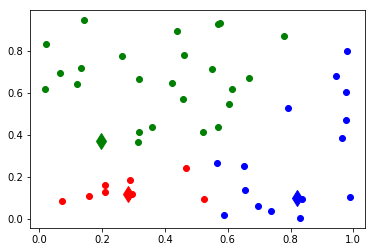

***** 第2次迭代 *****
聚类中心:  [0.37970846200000014, 0.6592585063999999]
对应聚类:  [[0.5488135, 0.71518937], [0.60276338, 0.54488318], [0.4236548, 0.64589411], [0.43758721, 0.891773], [0.56804456, 0.92559664], [0.0202184, 0.83261985], [0.77815675, 0.87001215], [0.46147936, 0.78052918], [0.11827443, 0.63992102], [0.14335329, 0.94466892], [0.52184832, 0.41466194], [0.26455561, 0.77423369], [0.45615033, 0.56843395], [0.0187898, 0.6176355], [0.61209572, 0.616934], [0.3595079, 0.43703195], [0.66676672, 0.67063787], [0.31798318, 0.41426299], [0.0641475, 0.69247212], [0.5759465, 0.9292962], [0.31856895, 0.66741038], [0.13179786, 0.7163272]]
聚类中心:  [0.812917116875, 0.283946053125]
对应聚类:  [[0.96366276, 0.38344152], [0.79172504, 0.52889492], [0.97861834, 0.79915856], [0.94374808, 0.6818203], [0.6976312, 0.06022547], [0.57019677, 0.43860151], [0.98837384, 0.10204481], [0.65310833, 0.2532916], [0.65632959, 0.13818295], [0.82099323, 0.09710128], [0.83794491, 0.09609841], [0.97645947, 0.4686512], [0.97676109

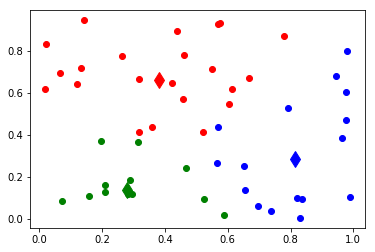

***** 第3次迭代 *****
聚类中心:  [0.38229563954545454, 0.6959284186363637]
对应聚类:  [[0.5488135, 0.71518937], [0.60276338, 0.54488318], [0.4236548, 0.64589411], [0.43758721, 0.891773], [0.56804456, 0.92559664], [0.0202184, 0.83261985], [0.77815675, 0.87001215], [0.46147936, 0.78052918], [0.11827443, 0.63992102], [0.14335329, 0.94466892], [0.26455561, 0.77423369], [0.45615033, 0.56843395], [0.0187898, 0.6176355], [0.61209572, 0.616934], [0.3595079, 0.43703195], [0.66676672, 0.67063787], [0.0641475, 0.69247212], [0.5759465, 0.9292962], [0.31856895, 0.66741038], [0.13179786, 0.7163272]]
聚类中心:  [0.8118973568750001, 0.310101925625]
对应聚类:  [[0.96366276, 0.38344152], [0.79172504, 0.52889492], [0.97861834, 0.79915856], [0.52184832, 0.41466194], [0.94374808, 0.6818203], [0.6976312, 0.06022547], [0.57019677, 0.43860151], [0.98837384, 0.10204481], [0.65310833, 0.2532916], [0.65632959, 0.13818295], [0.82099323, 0.09710128], [0.83794491, 0.09609841], [0.97645947, 0.4686512], [0.97676109, 0.60484552], [0.7392

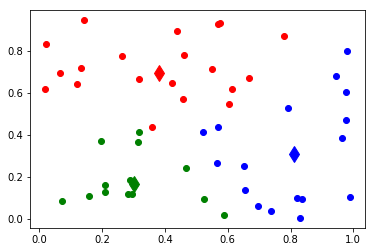

***** 第4次迭代 *****
聚类中心:  [0.3785336285, 0.724075014]
对应聚类:  [[0.5488135, 0.71518937], [0.60276338, 0.54488318], [0.4236548, 0.64589411], [0.43758721, 0.891773], [0.56804456, 0.92559664], [0.0202184, 0.83261985], [0.77815675, 0.87001215], [0.46147936, 0.78052918], [0.11827443, 0.63992102], [0.14335329, 0.94466892], [0.26455561, 0.77423369], [0.45615033, 0.56843395], [0.0187898, 0.6176355], [0.61209572, 0.616934], [0.66676672, 0.67063787], [0.0641475, 0.69247212], [0.5759465, 0.9292962], [0.31856895, 0.66741038], [0.13179786, 0.7163272]]
聚类中心:  [0.7948356488235295, 0.31625251470588234]
对应聚类:  [[0.96366276, 0.38344152], [0.79172504, 0.52889492], [0.97861834, 0.79915856], [0.52184832, 0.41466194], [0.94374808, 0.6818203], [0.6976312, 0.06022547], [0.57019677, 0.43860151], [0.98837384, 0.10204481], [0.65310833, 0.2532916], [0.65632959, 0.13818295], [0.82099323, 0.09710128], [0.83794491, 0.09609841], [0.97645947, 0.4686512], [0.97676109, 0.60484552], [0.73926358, 0.03918779], [0.56660145, 0.

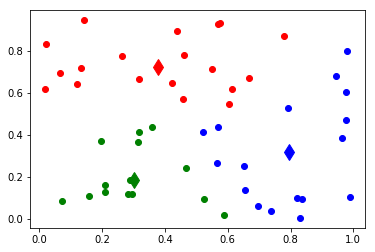

***** 第5次迭代 *****
聚类中心:  [0.379534982631579, 0.7391825436842104]
对应聚类:  [[0.5488135, 0.71518937], [0.60276338, 0.54488318], [0.4236548, 0.64589411], [0.43758721, 0.891773], [0.56804456, 0.92559664], [0.0202184, 0.83261985], [0.77815675, 0.87001215], [0.46147936, 0.78052918], [0.11827443, 0.63992102], [0.14335329, 0.94466892], [0.26455561, 0.77423369], [0.45615033, 0.56843395], [0.0187898, 0.6176355], [0.61209572, 0.616934], [0.66676672, 0.67063787], [0.0641475, 0.69247212], [0.5759465, 0.9292962], [0.31856895, 0.66741038], [0.13179786, 0.7163272]]
聚类中心:  [0.7948356488235295, 0.31625251470588234]
对应聚类:  [[0.96366276, 0.38344152], [0.79172504, 0.52889492], [0.97861834, 0.79915856], [0.52184832, 0.41466194], [0.94374808, 0.6818203], [0.6976312, 0.06022547], [0.57019677, 0.43860151], [0.98837384, 0.10204481], [0.65310833, 0.2532916], [0.65632959, 0.13818295], [0.82099323, 0.09710128], [0.83794491, 0.09609841], [0.97645947, 0.4686512], [0.97676109, 0.60484552], [0.73926358, 0.03918779], [0.

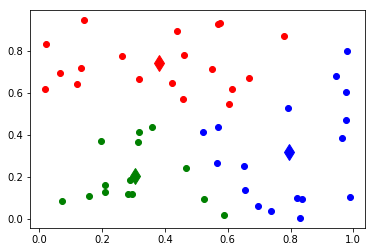

***** 第6次迭代 *****
聚类中心:  [0.379534982631579, 0.7391825436842104]
对应聚类:  [[0.5488135, 0.71518937], [0.60276338, 0.54488318], [0.4236548, 0.64589411], [0.43758721, 0.891773], [0.56804456, 0.92559664], [0.0202184, 0.83261985], [0.77815675, 0.87001215], [0.46147936, 0.78052918], [0.11827443, 0.63992102], [0.14335329, 0.94466892], [0.26455561, 0.77423369], [0.45615033, 0.56843395], [0.0187898, 0.6176355], [0.61209572, 0.616934], [0.66676672, 0.67063787], [0.0641475, 0.69247212], [0.5759465, 0.9292962], [0.31856895, 0.66741038], [0.13179786, 0.7163272]]
聚类中心:  [0.7948356488235295, 0.31625251470588234]
对应聚类:  [[0.96366276, 0.38344152], [0.79172504, 0.52889492], [0.97861834, 0.79915856], [0.52184832, 0.41466194], [0.94374808, 0.6818203], [0.6976312, 0.06022547], [0.57019677, 0.43860151], [0.98837384, 0.10204481], [0.65310833, 0.2532916], [0.65632959, 0.13818295], [0.82099323, 0.09710128], [0.83794491, 0.09609841], [0.97645947, 0.4686512], [0.97676109, 0.60484552], [0.73926358, 0.03918779], [0.

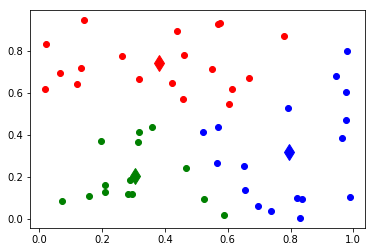

In [2]:
def findCentroids(data_get, k):    # 随机获取k个质心
 
    return random.sample(data_get, k)

def calculateDistance(vecA, vecB):    # 计算向量vecA和向量vecB之间的欧氏距离
 
    return numpy.sqrt(numpy.sum(numpy.square(vecA - vecB)))

def minDistance(data_get, centroidList):
    # 计算data_get中的元素与centroidList中k个聚类中心的欧式距离，找出距离最小的
    # 将该元素加入相应的聚类中
 
    clusterDict = dict()  # 用字典存储聚类结果
    for element in data_get:
        vecA = numpy.array(element)  # 转换成数组形式
        flag = 0  # 元素分类标记，记录与相应聚类距离最近的那个类
        minDis = float("inf")  # 初始化为最大值
 
        for i in range(len(centroidList)):
            vecB = numpy.array(centroidList[i])
            distance = calculateDistance(vecA, vecB)  # 两向量间的欧式距离
            if distance < minDis:
                minDis = distance
                flag = i  # 保存与当前item距离最近的那个聚类的标记
 
        if flag not in clusterDict.keys():  # 簇标记不存在，进行初始化
            clusterDict[flag] = list()
        clusterDict[flag].append(element)  # 加入相应的类中
 
    return clusterDict  # 返回新的聚类结果

def getCentroids(clusterDict):
 
    centroidList = list()
    for key in clusterDict.keys():
        centroid = numpy.mean(numpy.array(clusterDict[key]), axis=0)  # 求聚类中心即求解每列的均值
        centroidList.append(centroid)
 
    return numpy.array(centroidList).tolist()

def calculate_Var(clusterDict, centroidList):
    # 计算聚类间的均方误差
    # 将类中各个向量与聚类中心的距离进行累加求和
 
    sum = 0.0
    for key in clusterDict.keys():
        vecA = numpy.array(centroidList[key])
        distance = 0.0
        for item in clusterDict[key]:
            vecB = numpy.array(item)
            distance += calculateDistance(vecA, vecB)
        sum += distance
 
    return sum

def showCluster(centroidList, clusterDict):
    # 画聚类结果
 
    colorMark = ['or', 'ob', 'og', 'ok', 'oy', 'ow']  # 元素标记
    centroidMark = ['dr', 'db', 'dg', 'dk', 'dy', 'dw']  # 聚类中心标记
    for key in clusterDict.keys():
        plt.plot(centroidList[key][0], centroidList[key][1], centroidMark[key], markersize=12)  # 画聚类中心
        for item in clusterDict[key]:
            plt.plot(item[0], item[1], colorMark[key])  # 画类下的点
 
    plt.show()

data = [[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892],
       [0.52184832, 0.41466194],
       [0.26455561, 0.77423369],
       [0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  ],
       [0.94374808, 0.6818203 ],
       [0.3595079 , 0.43703195],
       [0.6976312 , 0.06022547],
       [0.66676672, 0.67063787],
       [0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077],
       [0.57019677, 0.43860151],
       [0.98837384, 0.10204481],
       [0.20887676, 0.16130952],
       [0.65310833, 0.2532916 ],
       [0.46631077, 0.24442559],
       [0.15896958, 0.11037514],
       [0.65632959, 0.13818295],
       [0.19658236, 0.36872517],
       [0.82099323, 0.09710128],
       [0.83794491, 0.09609841],
       [0.97645947, 0.4686512 ],
       [0.97676109, 0.60484552],
       [0.73926358, 0.03918779],
       [0.28280696, 0.12019656],
       [0.2961402 , 0.11872772],
       [0.31798318, 0.41426299],
       [0.0641475 , 0.69247212],
       [0.56660145, 0.26538949],
       [0.52324805, 0.09394051],
       [0.5759465 , 0.9292962 ],
       [0.31856895, 0.66741038],
       [0.13179786, 0.7163272 ],
       [0.28940609, 0.18319136],
       [0.58651293, 0.02010755],
       [0.82894003, 0.00469548]]

if __name__ == '__main__':
 
    centroidList = findCentroids(data, 3)  # 随机获取3个聚类中心
    clusterDict = minDistance(data, centroidList)  # 第一次聚类迭代
    newVar = calculate_Var(clusterDict, centroidList)  # 计算均方误差值，通过新旧均方误差来获得迭代终止条件
    oldVar = -0.0001  # 初始化均方误差
 
    print('***** 第1次迭代 *****')
    for key in clusterDict.keys():
        print('聚类中心: ', centroidList[key])
        print('对应聚类: ',clusterDict[key])
    print('平均均方误差: ', newVar)
    showCluster(centroidList, clusterDict)  # 展示聚类结果
 
    k = 2
    while abs(newVar - oldVar) >= 0.0001:  # 当连续两次聚类结果差距小于0.0001时，迭代结束
        centroidList = getCentroids(clusterDict)  # 获得新的聚类中心
        clusterDict = minDistance(data, centroidList)  # 新的聚类结果
        oldVar = newVar
        newVar = calculate_Var(clusterDict, centroidList)
 
        print('***** 第%d次迭代 *****' % k)
 
        for key in clusterDict.keys():
            print('聚类中心: ', centroidList[key])
            print('对应聚类: ', clusterDict[key])
        print('平均均方误差: ', newVar)
        showCluster(centroidList, clusterDict)  # 展示聚类结果
 
        k += 1
